<a href="https://colab.research.google.com/github/shikhasingh19611/datamining/blob/main/RBA124_Shikha_Singh_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_excel('/content/random_excel_data_updated.xlsx', sheet_name = 'Sheet1')

In [ ]:
data

,Employee ID,Department,Salary (INR),Working Hours
0,3580,Finance,142441,5
1,8398,Sales,139693,10
2,2915,Sales,96495,8
3,6549,Sales,32245,4
4,9908,Finance,75611,4
5,5328,IT,87865,7
6,6971,Sales,100650,10
7,9243,IT,64967,10
8,9681,Sales,119380,4
9,7481,HR,130166,4


In [ ]:
data.head(10)

,Employee ID,Department,Salary (INR),Working Hours
0,3580,Finance,142441,5
1,8398,Sales,139693,10
2,2915,Sales,96495,8
3,6549,Sales,32245,4
4,9908,Finance,75611,4
5,5328,IT,87865,7
6,6971,Sales,100650,10
7,9243,IT,64967,10
8,9681,Sales,119380,4
9,7481,HR,130166,4


In [ ]:
data.describe()

,Employee ID,Salary (INR),Working Hours
count,50.000000,50.000000,50.0000
mean,5955.340000,93819.080000,7.0000
std,2523.545777,35834.995162,2.2315
min,1209.000000,30484.000000,4.0000
25%,3766.250000,67198.250000,5.0000
50%,6301.500000,92865.000000,7.0000
75%,7734.000000,127469.500000,9.0000
max,9915.000000,148898.000000,10.0000


In [ ]:
data.describe(include= 'object') #for categorical data

,Department
count,50
unique,5
top,Sales
freq,16


In [ ]:
#check for duplicates
data.duplicated().sum()

0

There is no duplicate data


In [ ]:
#check for missing values
data.isnull().sum()

,0
Employee ID,0
Department,0
Salary (INR),0
Working Hours,0


There is no null in the dataset


Text(0, 0.5, 'Salary (INR)')

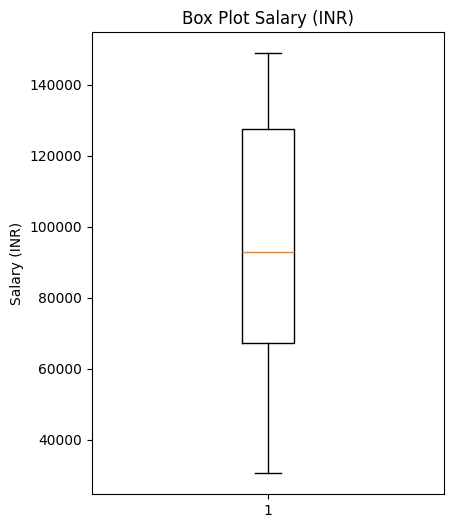

In [ ]:
#box plot to check skewness and outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.boxplot(data["Salary (INR)"])
plt.title("Box Plot Salary (INR)")
plt.ylabel("Salary (INR)")



The box plot shows a right-skewed salary distribution, with the median closer to the lower quartile. No extreme outliers are visible, indicating a relatively consistent salary range.


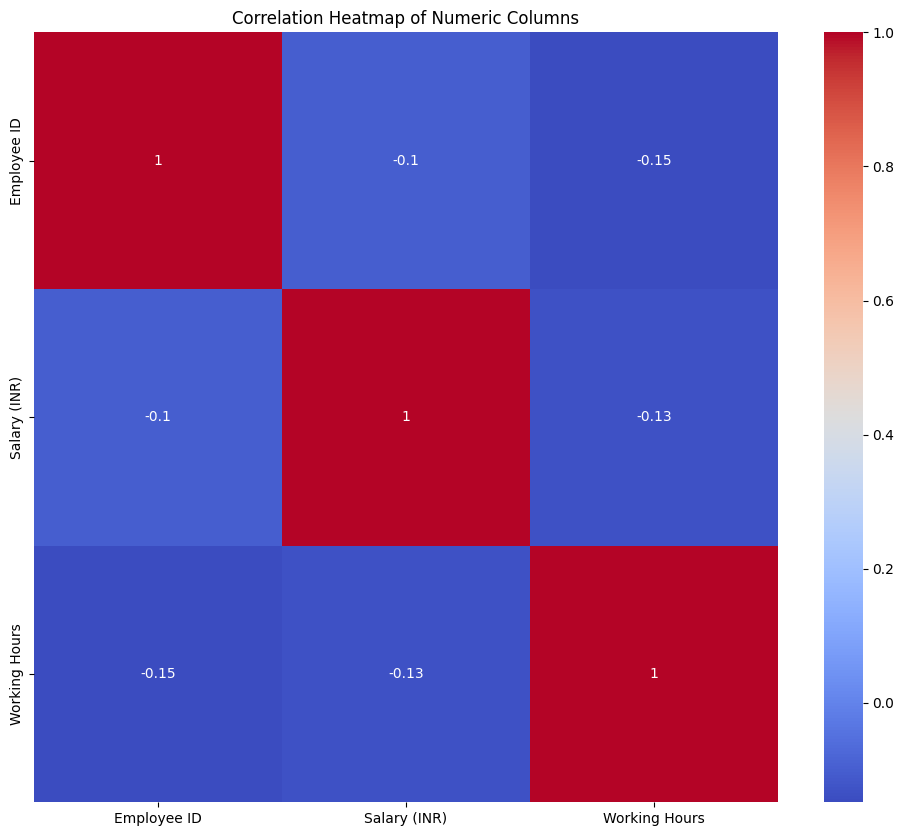

In [ ]:
#extraxt heatmap on numeric col
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = data.select_dtypes(include=['number'])
plt.figure(figsize=(12,10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

The heatmap shows weak correlations between numeric variables, with salary and working hours having a slight negative correlation (-0.13). No strong relationships exist, suggesting independent variables with minimal linear association.


In [ ]:
#let dependent variable y Salary (INR) and independent variable x be Working Hours
import matplotlib.pyplot as plt
import statsmodels.api as sm

#define the dependent and independent variable
y = data['Salary (INR)']
x = data['Working Hours']

In [ ]:
x

,Working Hours
0,5
1,10
2,8
3,4
4,4
5,7
6,10
7,10
8,4
9,4


In [ ]:
y


,Salary (INR)
0,142441
1,139693
2,96495
3,32245
4,75611
5,87865
6,100650
7,64967
8,119380
9,130166


In [ ]:
# prompt: extract simple linear regression on x and y(use stats model)

# Add a constant to the independent variable
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Salary (INR)   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8670
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.356
Time:                        05:06:15   Log-Likelihood:                -594.33
No. Observations:                  50   AIC:                             1193.
Df Residuals:                      48   BIC:                             1196.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.088e+05   1.69e+04      6.452

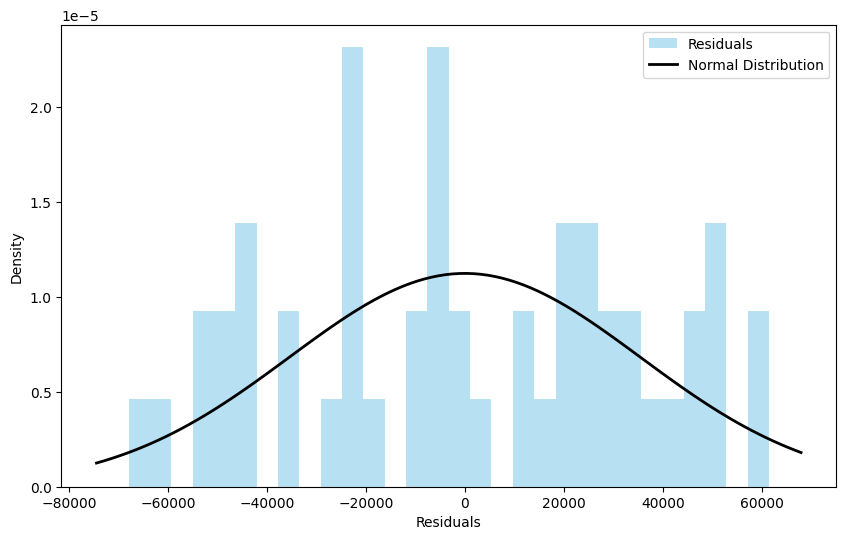

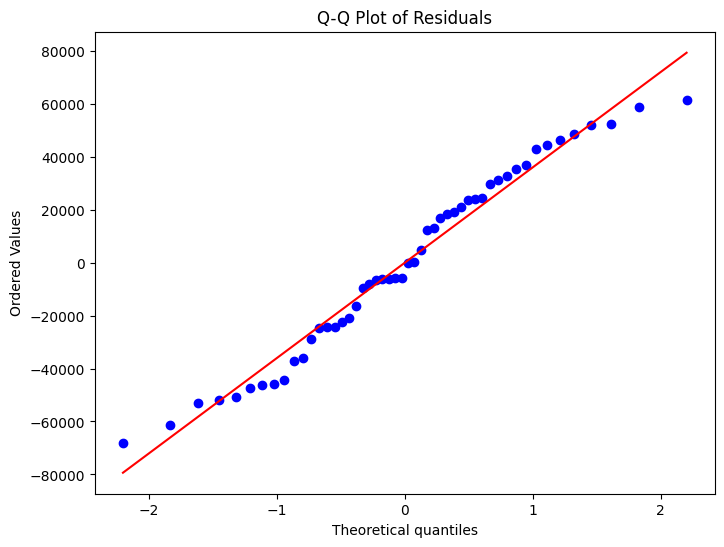

In [ ]:
#check distribution of residual
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

#get the residuals fromm the model
residuals = model.resid

#create a histogram of the residuals
plt.figure(figsize=(10,6 ))
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='skyblue', label='Residuals')
xmin, xmax  = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, residuals.mean(), residuals.std())
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show

#create a Q-Q plot of the residuals
plt.figure(figsize=(8,6 ))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

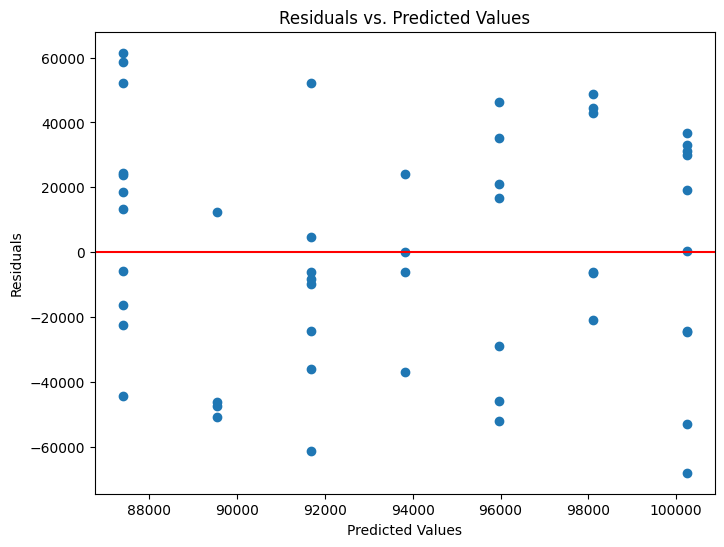

In [ ]:
# prompt: check for homoscedasticity using scatter plot

#create a scatter plot of residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.show()


Interpretation:
The residuals seem fairly scattered around the red dashed zero line.


In [ ]:
# prompt: conduct white for testing homoscedasticity

import statsmodels.stats.api as sms

# Perform the Breusch-Pagan test
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)

# Print the test results
print(bp_test)

# Interpret the results
alpha = 0.05  # Significance level
if bp_test[1] < alpha:
    print("The null hypothesis of homoscedasticity is rejected.")
    print("There is evidence of heteroscedasticity.")
else:
    print("The null hypothesis of homoscedasticity is not rejected.")
    print("There is no evidence of heteroscedasticity.")

#Alternatively, you can use the Goldfeld-Quandt test

gq_test = sms.het_goldfeldquandt(model.resid, model.model.exog)
print(gq_test)

alpha = 0.05  # Significance level
if gq_test[1] < alpha:
    print("The null hypothesis of homoscedasticity is rejected.")
    print("There is evidence of heteroscedasticity.")
else:
    print("The null hypothesis of homoscedasticity is not rejected.")
    print("There is no evidence of heteroscedasticity.")


(0.024828598418069614, 0.8747949107681141, 0.023847296380250425, 0.8779215849098188)
The null hypothesis of homoscedasticity is not rejected.
There is no evidence of heteroscedasticity.
(1.0840129768496318, 0.4241361327248264, 'increasing')
The null hypothesis of homoscedasticity is not rejected.
There is no evidence of heteroscedasticity.


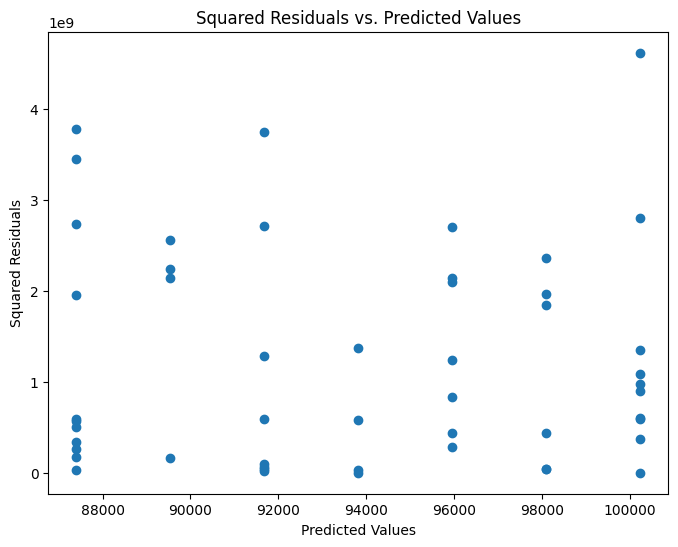

In [ ]:
# prompt: plot predicted values vs squared residuals


# Create a scatter plot of predicted values vs. squared residuals
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, np.square(residuals))
plt.xlabel("Predicted Values")
plt.ylabel("Squared Residuals")
plt.title("Squared Residuals vs. Predicted Values")
plt.show()


The plot suggests no heteroscedasticity, with some large squared residuals indicating potential outliers.